<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
#----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
R

¿Elige A para dataset de ciudades + areas metropolitanas + estados o la opción B regiones geograficas? Escribe 'A' o 'B':  b


Has seleccionado la opción B.
['California' 'GreatLakes' 'Midsouth' 'Northeast' 'Plains' 'SouthCentral'
 'Southeast' 'West']
#----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB
#----------------------------------------------------------------------------------------------------


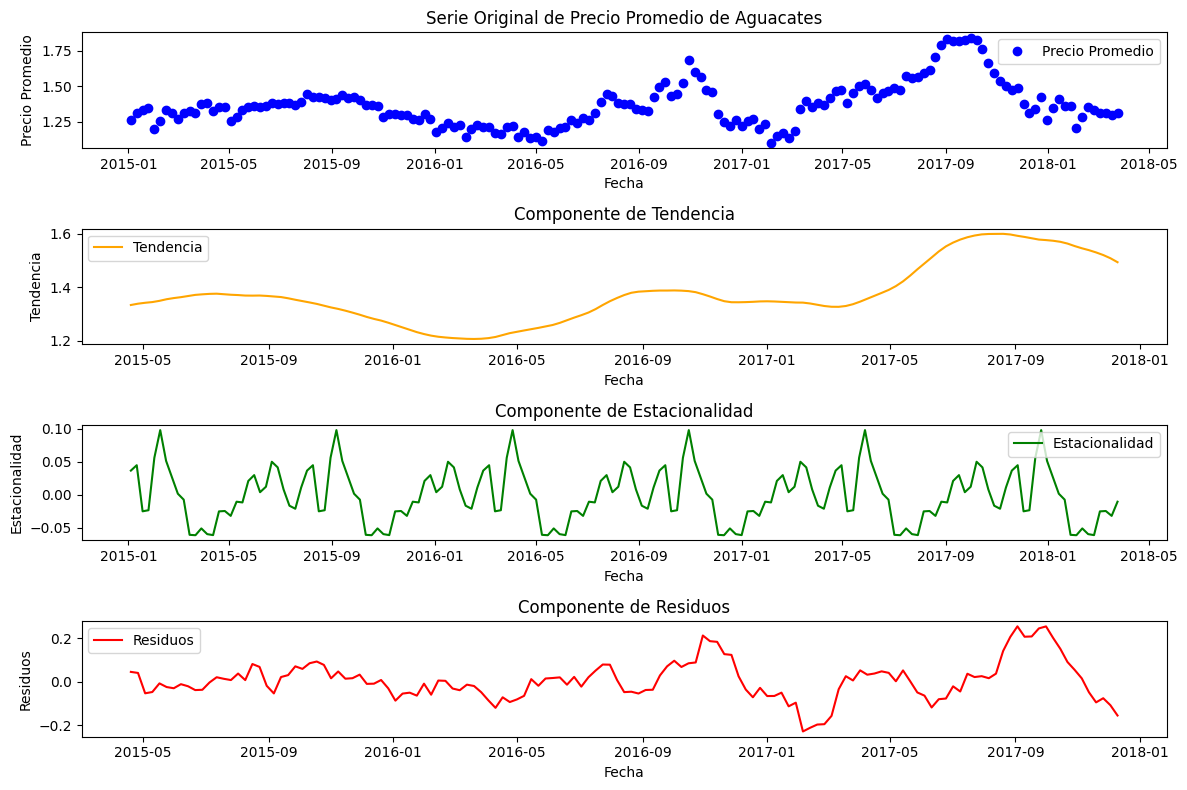

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose   # para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido.

# Cargar el conjunto de datos
data = pd.read_csv('/home/jose/avocado/Avocado/regresion/avocado.csv')

# Comprobación de valores faltantes,tipos de datos,tamaño en memoria 
data.info()
print("#"+ '-'*100)
# Realizo un copy para no perder el daset original
data_avo=data.copy 

# tarbajo con data_avo y elimino primera columna sin nombre, puede ser un indice exportado
data_avo=data.drop(columns=['Unnamed: 0'])
data_avo.info()
print("#"+ '-'*100)

print(data.head())
print("#"+ '-'*100)

# Eliminación de datos correspondientes a regiones de EE.UU. agrupadas 
 
print(data_avo['region'].unique())
print("#"+ '-'*100)

'''  En region (Ubicación en la que se realizó la medición) existen 9 reginores y 11 areas metropolitanas  
Con respecto a Total U.S., los datos están agregados de áreas geográficas de los Estados Unidos,
lo que podría resultar en posibles errores de análisis.  '''

# Listado de regiones específicas a incluir
areas_metro_regionesgeogra = ["BaltimoreWashington","BuffaloRochester","CincinnatiDayton","DallasFtWorth","GreatLakes",
                        "HarrisburgScranton","HartfordSpringfield","MiamiFtLauderdale", "Midsouth","NewOrleansMobile",
                        "Northeast", "NorthernNewEngland","PhoenixTucson","Plains","RaleighGreensboro", 
                        "RichmondNorfolk","SouthCentral","Southeast","West","WestTexNewMexico"]


#regiones_geograficas= ["GreatLakes","Midsouth","Northeast","NorthernNewEngland","Plains","SouthCentral","Southeast","West","WestTexNewMexico"]
regiones_geograficas= ["California","GreatLakes","Midsouth","Northeast","Plains","SouthCentral","Southeast","West"]

# Filtrar las filas que contienen las regiones específicas

volumen_areas_metro_regionesgeogra = data_avo[data_avo['region'].isin(areas_metro_regionesgeogra)]['Total Volume'].sum()
print(f"El total volumen de areas metropolitanas + regiones geograficas es: {volumen_areas_metro_regionesgeogra:,.2f}" )

volumen_regiones_geograficas = data_avo[data_avo['region'].isin(regiones_geograficas)]['Total Volume'].sum()

print(f"El total volumen de las regiones geograficas es: {volumen_regiones_geograficas:,.2f}" )

# Filtrar el volumen total para la región 'TotalUS'
volumen_total_us = data_avo[data_avo['region'] == "TotalUS"]['Total Volume'].sum()

print(f"El total volumen_total_us es: {volumen_total_us:,.2f}" )
print("#"+ '-'*100)

# En este análisis : 

'''se eliminaran estas regiones geograficas grandes y total US, ya que generarían conclusiones erroneas,
  nos quedamos con el dataset de ciudades + areas metropolitanas  + estados ( California y SouthCarolina) '''

# Pregunta al usuario para que elija entre dos opciones obligatorias
while True:
    respuesta = input("¿Elige A para dataset de ciudades + areas metropolitanas + estados o la opción B regiones geograficas? Escribe 'A' o 'B': ").strip().upper()
    
    if respuesta == 'A':
        print("Has seleccionado la opción A.")
        filt = data_avo['region'].isin(["TotalUS","GreatLakes","Midsouth","Northeast","NorthernNewEngland","Plains","SouthCentral","Southeast","West","WestTexNewMexico"])
        data_avo=data_avo[~filt]
        break
    elif respuesta == 'B':
        print("Has seleccionado la opción B.")
        data_avo=data_avo[data_avo['region'].isin(regiones_geograficas)]
        break
    else:
        print("Respuesta no válida. Por favor, elige 'A' o 'B'.")
 
#filt = data_avo['region'].isin(["TotalUS","GreatLakes","Midsouth","Northeast","NorthernNewEngland","Plains","SouthCentral","Southeast","West","WestTexNewMexico"])
#filt_reg_geo = data_avo['region'].isin([regiones_geograficas])
#print(data_avo)

volumen_ciudades_areas_estados = data_avo['Total Volume'].sum()


print(data_avo['region'].unique())
print("#"+ '-'*100)                               

# 1. Análisis de Series Temporales


data_avo['Date'] = pd.to_datetime(data_avo['Date'])
data_avo.dtypes 

promedio_precio = data_avo.groupby('Date')['AveragePrice'].mean().reset_index()

promedio_precio.info()
print("#"+ '-'*100) 
# Establecer Date como índice y especificar la frecuencia
promedio_precio.set_index('Date', inplace=True)

# 
"""
D	Diario	
B	Día hábil (sin fines de semana)	
W	Semanal	
M	Fin de mes	
Q	Fin de trimestre	
Y	Fin de año	
H	Horas	
T o min	Minutos
"""
#promedio_precio = promedio_precio.resample('M').mean()
#promedio_precio = promedio_precio.asfreq('D')

if promedio_precio['AveragePrice'].isnull().any():
    print("Valores nulos encontrados. Procediendo a manejarlos.")
    promedio_precio = promedio_precio.dropna()

# Descomponer la serie temporal en componentes de tendencia, estacionalidad y residuos.
result = seasonal_decompose(promedio_precio['AveragePrice'], model='additive',period=30)

# Crear gráficos para los componentes
plt.figure(figsize=(12, 8))

# Gráfico de la serie original
plt.subplot(4, 1, 1)
plt.plot(promedio_precio['AveragePrice'],marker='o', linestyle='', label='Precio Promedio', color='blue')
plt.title('Serie Original de Precio Promedio de Aguacates')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend()

# Gráfico de la tendencia
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia', color='orange')
plt.title('Componente de Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Tendencia')
plt.legend()

# Gráfico de la estacionalidad
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad', color='green')
plt.title('Componente de Estacionalidad')
plt.xlabel('Fecha')
plt.ylabel('Estacionalidad')
plt.legend()

# Gráfico de los residuos
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuos', color='red')
plt.title('Componente de Residuos')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.legend()

# Ajustar el layout
plt.tight_layout()
plt.show()





AveragePrice    0
Total Volume    0
dtype: int64
         region  AveragePrice
0    California      1.395325
1    GreatLakes      1.338550
2      Midsouth      1.404763
3     Northeast      1.601923
4        Plains      1.436509
5  SouthCentral      1.101243
6     Southeast      1.398018
7          West      1.272219
         region  year   Estacion  AveragePrice
0    California  2015   Invierno      1.126667
1    California  2015      Otoño      1.420385
2    California  2015  Primavera      1.241429
3    California  2015     Verano      1.466154
4    California  2016   Invierno      1.175385
..          ...   ...        ...           ...
107        West  2017      Otoño      1.780769
108        West  2017  Primavera      1.102308
109        West  2017     Verano      1.592308
110        West  2018   Invierno      1.301875
111        West  2018  Primavera      1.287500

[112 rows x 4 columns]


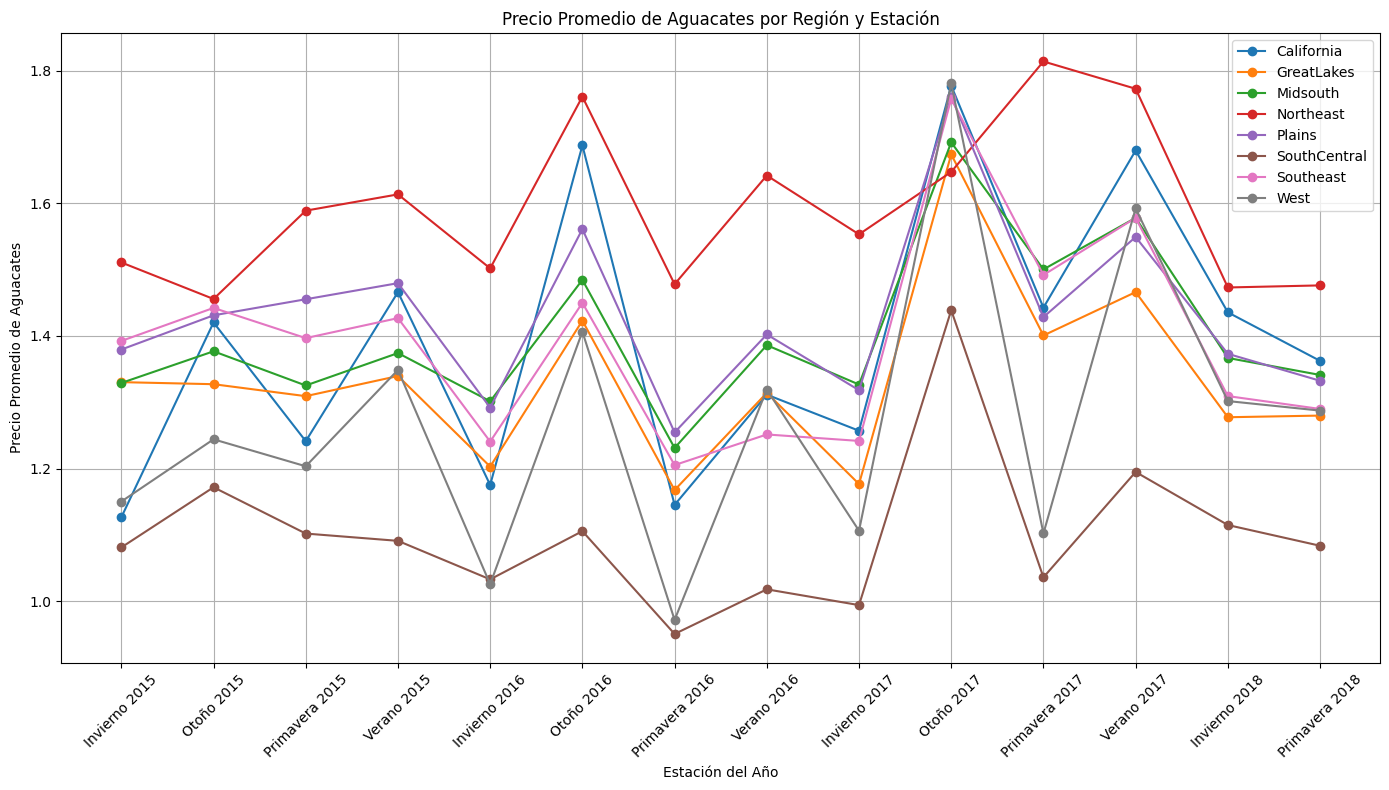

In [14]:
# 2. **Análisis de Estacionalidad por Región:** 


# Añadir una columna para la estación del año

def obtener_estacion(fecha):
    if fecha.month in [12, 1, 2]:
        return 'Invierno'
    elif fecha.month in [3, 4, 5]:
        return 'Primavera'
    elif fecha.month in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

# se crea nueva columna
data_avo['Estacion'] = data_avo['Date'].apply(obtener_estacion)


# Calcular el promedio de AveragePrice por región y estación
promedio_por_estacion = data_avo.groupby(['region','year', 'Estacion'])['AveragePrice'].mean().reset_index()


# Verificar si hay valores nulos en AveragePrice o Total Volume
print(data_avo[['AveragePrice', 'Total Volume']].isnull().sum())

# Calcular el promedio de 'AveragePrice' para cada región
promedio_precio_region = data_avo.groupby('region', as_index=False)['AveragePrice'].mean()

# Ordenar por 'AveragePrice' en orden descendente
# average_price_per_region_sorted = average_price_per_region.sort_values(by='AveragePrice', ascending=False)

print(promedio_precio_region)
print(promedio_por_estacion)

# Graficar los datos

#for region in promedio_por_estacion['region'].unique():
#   region_data = promedio_por_estacion[promedio_por_estacion['region'] == region]
#    plt.plot(region_data['Estacion'], region_data['AveragePrice'], marker='o', label=f'Precio Promedio - {region}')

# Graficar cada región con un color diferente

plt.figure(figsize=(14, 8))
for region, group in promedio_por_estacion.groupby('region'):
    group['Estacion'] = group['Estacion'] + ' ' + group['year'].astype(str)
    plt.plot(group['Estacion'], group['AveragePrice'], label=region, marker='o')

# Añadir títulos y etiquetas
plt.title('Precio Promedio de Aguacates por Región y Estación')
plt.xlabel('Estación del Año')
plt.ylabel('Precio Promedio de Aguacates')
plt.xticks(rotation=45)  # No rotar las etiquetas del eje x
plt.legend()
plt.grid()
plt.tight_layout()  # Ajustar el diseño para que no se corten los elementos

# Mostrar el gráfico
plt.show()